<a href="https://colab.research.google.com/github/dain1403/Deep-Learning-with-Colab/blob/master/02_Cifa100_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cifar-100

In [49]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [50]:
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Jul  7 05:54 model
drwxr-xr-x 1 root root 4096 Jun 26 16:26 sample_data


In [51]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [52]:
from tensorflow import keras

In [71]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = \
                                cifar100.load_data(label_mode='fine')

In [72]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [73]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

데이터확인

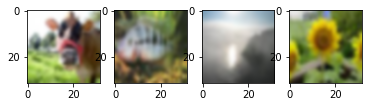

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [75]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

In [76]:
dir(cifar100)

['K',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_batch',
 'load_data',
 'np',
 'os',
 'print_function']

In [77]:
## https://corochann.com/cifar-10-cifar-100-dataset-introduction-1258.html
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [78]:
CIFAR100_LABELS_LIST[y_train[0][0]],CIFAR100_LABELS_LIST[y_train[4][0]], \
    CIFAR100_LABELS_LIST[y_train[8][0]],CIFAR100_LABELS_LIST[y_train[12][0]]

('cattle', 'aquarium_fish', 'cloud', 'sunflower')

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding


In [79]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [80]:

Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

### 자료의 일부만 사용하여 모델 테스트 하기

In [81]:
from sklearn.model_selection import train_test_split

#### 모형 구현

In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation


In [83]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [84]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [85]:
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

###### Callback 선언

In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [87]:
modelpath = "model/cifar-100-{epoch:03d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [88]:
history = model.fit(X_train, Y_train, epochs=300, batch_size=50,
                    validation_data=(X_test, Y_test), verbose=1,
                    callbacks=[checkpointer, early_stopping_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 13s 256us/step - loss: 4.3519 - accuracy: 0.0403 - val_loss: 3.9869 - val_accuracy: 0.0994

Epoch 00001: val_loss improved from inf to 3.98689, saving model to model/cifar-100-001-3.9869.hdf5
Epoch 2/300
  800/50000 [..............................] - ETA: 11s - loss: 4.0433 - accuracy: 0.0850

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


50000/50000 [==============================] - 12s 245us/step - loss: 3.9075 - accuracy: 0.1050 - val_loss: 3.6384 - val_accuracy: 0.1651

Epoch 00002: val_loss improved from 3.98689 to 3.63839, saving model to model/cifar-100-002-3.6384.hdf5
Epoch 3/300
50000/50000 [==============================] - 12s 242us/step - loss: 3.6712 - accuracy: 0.1434 - val_loss: 3.4253 - val_accuracy: 0.2041

Epoch 00003: val_loss improved from 3.63839 to 3.42535, saving model to model/cifar-100-003-3.4253.hdf5
Epoch 4/300
50000/50000 [==============================] - 13s 255us/step - loss: 3.5008 - accuracy: 0.1709 - val_loss: 3.2973 - val_accuracy: 0.2242

Epoch 00004: val_loss improved from 3.42535 to 3.29733, saving model to model/cifar-100-004-3.2973.hdf5
Epoch 5/300
50000/50000 [==============================] - 12s 243us/step - loss: 3.3674 - accuracy: 0.1926 - val_loss: 3.1571 - val_accuracy: 0.2516

Epoch 00005: val_loss improved from 3.29733 to 3.15708, saving model to model/cifar-100-005-3.15

In [ ]:
del model

In [94]:
from keras.models import load_model
model = load_model('model/cifar-100-064-2.0048.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [95]:
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, metrics=['accuracy'])

In [96]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 160us/step

 Test Accuracy: 0.4860


#### 결과 그래프로 확인하기

In [97]:

# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

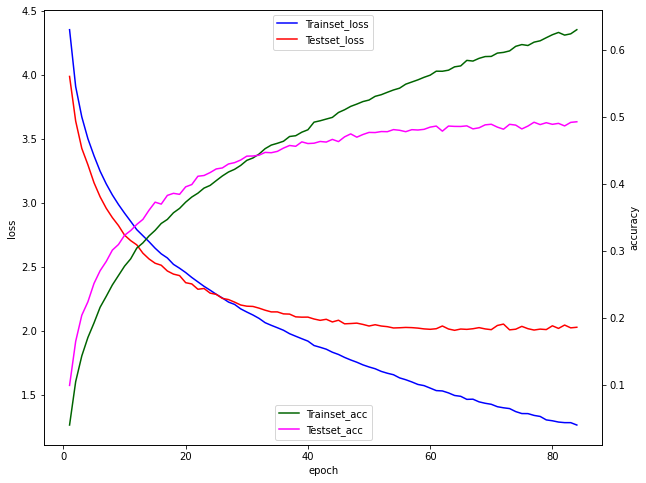

In [98]:

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()

In [99]:

!ls -l model

total 235200
-rw-r--r-- 1 root root 4813248 Jul  7 07:36 cifar-100-001-3.9869.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:36 cifar-100-002-3.6384.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:36 cifar-100-003-3.4253.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:36 cifar-100-004-3.2973.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:36 cifar-100-005-3.1571.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:37 cifar-100-006-3.0468.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:37 cifar-100-007-2.9576.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:37 cifar-100-008-2.8848.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:37 cifar-100-009-2.8229.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:37 cifar-100-010-2.7477.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:38 cifar-100-011-2.7050.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:38 cifar-100-012-2.6719.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:38 cifar-100-013-2.6069.hdf5
-rw-r--r-- 1 root root 4813248 Jul  7 07:38 cifar-100-014-2.5621.hdf5
-rw-r--